# 第5回演習「線形回帰」

この演習では勾配法を用いた線形回帰の方法を習得します。<hr />

<img src="https://pfe.p.cyber-u.ac.jp/img/Python/Week5/regression.png" style="width:400px">

UMAの年齢から身長を推測するための回帰式を求めましょう。<br />
下のプログラムは、実行すると数秒程度待たされます。キーの連打などはせずに、静かに待ちましょう。


41088 回繰り返しました
勾配法で得られた、損失関数を最小にするaとbは
8.477403460299513
145.09863070323775
最終的な平均二乗誤差
344.72719664673


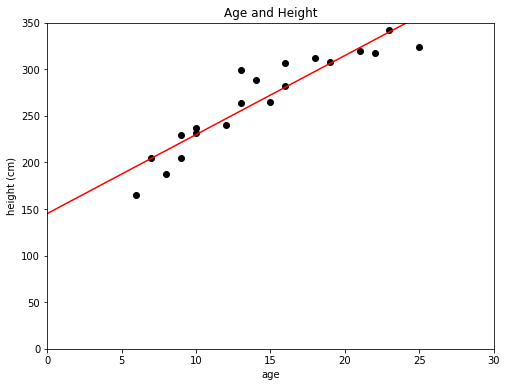

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# UMAの年齢と身長
年齢 = np.array([6,8,9,7,9,10,10,12,13,15,16,14,13,16,19,18,22,21,25,23])
身長 = np.array([164.61,187.25,204.30,204.88,229.48,231.99,236.59,240.36,263.98,264.79,281.85,288.38,298.75,306.34,307.48,312.44,317.72,319.41,323.96,341.96])

# 最小化したい損失関数は、平均二乗誤差として定義
def 損失関数(パラメタベクトル): # パラメタベクトル[0]がy=ax+bにおけるa、パラメタベクトル[1]がb
    パラメタa = パラメタベクトル[0]
    パラメタb = パラメタベクトル[1]    
    # 誤差を二乗し、meanでその平均を求めて返す
    # 年齢や身長が配列であることに注意
    return np.mean((パラメタa * 年齢 + パラメタb - 身長)**2) 

def 偏微分もどき(関数, 現在地のベクトル): # 全ての変数について偏微分した結果を傾きベクトルにする    
    傾きベクトル = np.empty_like(現在地のベクトル) # 空の傾きベクトルを生成
    for i in range(len(現在地のベクトル)):
        # 変数のi番目で「偏微分もどきの下請け」に出す
        傾きベクトル[i] = 偏微分もどきの下請け(関数, 現在地のベクトル, i)
    
    return 傾きベクトル # 確定した傾きベクトルを返す

def 偏微分もどきの下請け(関数, 現在地のベクトル, i):
    微小な横幅 = 0.0001    
    差分計算ベクトル = np.zeros_like(現在地のベクトル) # まずゼロ埋めする
    差分計算ベクトル[i] = 微小な横幅     # 差分計算の対象となるi番目にのみ、微小な横幅を入れる
    # 微小な横幅を使って引き算と割り算を行い、傾きを求めて返す
    return (関数(現在地のベクトル+差分計算ベクトル) - 関数(現在地のベクトル-差分計算ベクトル)) / (2*微小な横幅)

def 勾配法(関数, 出発地点のベクトル, 学習率=0.001, 最大繰り返し数=100000):
    現在地のベクトル = 出発地点のベクトル
    収束条件の傾き = 0.001
    
    for i in range(最大繰り返し数): # 収束するまで繰り返し
        # 現在地での傾き(ベクトル)を求める
        傾きベクトル = 偏微分もどき(関数, 現在地のベクトル) 
        # 勾配を元にして現在地を変更
        現在地のベクトル = 現在地のベクトル - 学習率 * 傾きベクトル
        # 収束条件の傾きをどちらも下回ったらループ終了、ただしiが0の時は傾きベクトルが[0,0]なので終了しない
        if abs(傾きベクトル[0]) < 収束条件の傾き and abs(傾きベクトル[1]) < 収束条件の傾き and i > 0:        
            break

    # 最終的な位置を返す
    print(str(i)+" 回繰り返しました")    
    return 現在地のベクトル

# 勾配法で関数の最小値を探す (初期値は 5,5)
最小値 = 勾配法(損失関数, [5, 5])
print("勾配法で得られた、損失関数を最小にするaとbは")
print(最小値[0])
print(最小値[1])
print("最終的な平均二乗誤差")
print(損失関数(最小値))

########################## 仕上げに散布図を描き、回帰直線も表示
plt.figure(figsize = (8, 6))
plt.title("Age and Height")
plt.xlim([0, 30])
plt.ylim([0, 350])
plt.xlabel("age")
plt.ylabel("height (cm)")
plt.scatter(年齢,身長,color="k") # 散布図
# 直線を重ねる
############ この下の3行のコメントを外しましょう ############
x2 = np.linspace(0,30,10) # X軸方向の等間隔の配列
y2 = 最小値[0]*x2+最小値[1] # Y軸方向の値も配列にする(ax+b の値)
plt.plot(x2,y2,color="r")
plt.show()

## 任意課題

出力された散布図に、回帰直線を重ねて表示しましょう。<br />
上のプログラム中の「この下の3行のコメントを外しましょう」を探してください。

ここまでで、第5回第4章は終了です。お疲れさまでした。
